# Artificial Intelligence: Image Detection using Azure Cognitive Services (Vision)
This page contain a script of an Artificial Intelligence Image detection using Microsoft Azure Cognitive Services (Vision).

To script will detect if the image uploaded is an image.

## Fixing the API 
Here we will fix the necessary endpoints, keys to configure the Vision API

In [3]:
visionURI = 'westcentralus.api.cognitive.microsoft.com'
visionKey = '8d3c96529b03445691e9a4f9063bce94'

## Load the image to test

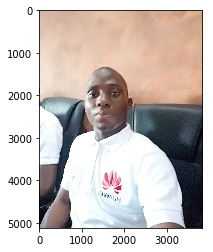

In [1]:
%matplotlib inline
from matplotlib.pyplot import imshow
from PIL import Image
import requests
from io import BytesIO

img_url = 'https://raw.githubusercontent.com/classicalmuheeb/ImageForComputerVision/master/IMG_20181002_160146-1.jpg'

# Get the image and show it
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
imshow(img)

## Use the Computer Vision API to Get image features

In [4]:
#img_url = 'C:\\Users\\Aspiring Coder\\Desktop\\Andela Practices\\Python\\Artificial Intelligence\\image.jpg'

#a method to get image features obtain Computer Vision API
def get_image_features(img_url):
    import http.client, urllib.request, urllib.parse, urllib.error, base64, json
    
    headers = {
        # Request headers.
        'Content-Type': 'application/json',
        'Ocp-Apim-Subscription-Key': visionKey,
    }

    params = urllib.parse.urlencode({
        # Request parameters. All of them are optional.
        'visualFeatures': 'Categories,Description,Color',
        'language': 'en',
    })


    body = "{'url':'" + img_url + "'}"

    try:
        # Execute the REST API call and get the response.
        conn = http.client.HTTPSConnection(visionURI)
        conn.request("POST", "/vision/v1.0/analyze?%s" % params, body, headers)
        response = conn.getresponse()
        data = response.read()

        # 'data' contains the JSON response.
        parsed = json.loads(data.decode("UTF-8"))
        if response is not None:
            return parsed
        conn.close()


    except Exception as e:
        print('Error:')
        print(e)
        
jsonData = get_image_features(img_url)
desc = jsonData['description']['captions'][0]['text']
confidence = jsonData['description']['captions'][0]['confidence']
print('Description: ', desc)
print('How sure I am: ', confidence, ' %')

Description:  a person sitting posing for the camera
How sure I am:  0.9375081148496349  %


## Try with another image

Description:  a man standing in a room
How sure I am:  0.925143323564365  %


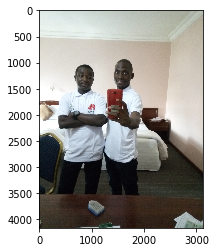

In [6]:
#img_url = 'https://raw.githubusercontent.com/classicalmuheeb/ImageForComputerVision/master/IMG_20181007_093848.jpg'
img_url = 'https://raw.githubusercontent.com/classicalmuheeb/ImageForComputerVision/master/IMG_20181002_134058.jpg'

#get image
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
imshow(img)

imageJSONData = get_image_features(img_url) #get JSON format of the image description from Computer Vision API
desc = imageJSONData['description']['captions'][0]['text']
confidence = imageJSONData['description']['captions'][0]['confidence']
print('Description: ', desc)
print('How sure I am: ', confidence, ' %')                                    

## Try with another image

Description:  a man sitting at a table
How sure I am:  0.9501995775169451 %


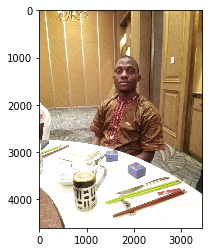

In [15]:
#image url
img_url = 'https://raw.githubusercontent.com/classicalmuheeb/ImageForComputerVision/master/IMG_20181019_114627.jpg'

#get image
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
imshow(img)

imgJSONdata = get_image_features(img_url)
info = imgJSONdata['description']['captions'][0]['text'] #to get the description obtained from Computer Vision API
confidencePercent = imgJSONdata['description']['captions'][0]['confidence']

print('Description: ', info)
print('How sure I am: ', confidencePercent, '%')

## To print the JSON format of the response received from the Computer Vision API

In [13]:
import json

#to view the full response
print(json.dumps(imgJSONdata, sort_keys = True, indent = 2))

{
  "categories": [
    {
      "detail": {
        "celebrities": []
      },
      "name": "people_",
      "score": 0.37890625
    }
  ],
  "color": {
    "accentColor": "90A12A",
    "dominantColorBackground": "Brown",
    "dominantColorForeground": "White",
    "dominantColors": [
      "White",
      "Brown"
    ],
    "isBWImg": false,
    "isBwImg": false
  },
  "description": {
    "captions": [
      {
        "confidence": 0.9501995775169451,
        "text": "a man sitting at a table"
      }
    ],
    "tags": [
      "person",
      "table",
      "sitting",
      "man",
      "front",
      "coffee",
      "food",
      "woman",
      "laptop",
      "standing",
      "eating",
      "plate",
      "cake",
      "holding",
      "people",
      "room",
      "phone"
    ]
  },
  "metadata": {
    "format": "Jpeg",
    "height": 4608,
    "width": 3456
  },
  "requestId": "5c6580f3-eb7e-43e4-8d7e-0da1cac9e066"
}
